In [1]:
"""
Organizing good plots for syntax, espeically:
- euclidian dist
- state space
"""

'\nOrganizing good plots for syntax, espeically:\n- euclidian dist\n- state space\n'

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load DFallPa dataset

In [3]:
from neuralmonkey.scripts.analy_dfallpa_extract import extract_dfallpa_helper
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper
from pythonlib.tools.pandastools import append_col_with_grp_index
import seaborn as sns
import os
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_trajectories_single, euclidian_distance_compute_trajectories

animal = "Diego"

version = "stroke"
combine = False

date = 230913
question = "RULE_ANBMCK_STROKE"

# date = 230922
# question = "RULESW_ANY_SEQSUP_STROKE"

# Load a single DFallPA
DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, 
                                    question=question)

dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


Loading DFallpa from:  /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230913-stroke-kilosort_if_exists-norm=None-combine=False-t1=-1.0-t2=1.8-quest=RULE_ANBMCK_STROKE.pkl
TODO: Pancho -- combine circles with the tohers
 == (1) Matching chans across events
M1_m  ...  15
M1_m  -- n chans final:  15
M1_l  ...  11
M1_l  -- n chans final:  11
PMv_l  ...  32
PMv_l  -- n chans final:  32
PMv_m  ...  31
PMv_m  -- n chans final:  31
PMd_p  ...  29
PMd_p  -- n chans final:  29
PMd_a  ...  20
PMd_a  -- n chans final:  20
dlPFC_a  ...  22
dlPFC_a  -- n chans final:  22
vlPFC_p  ...  27
vlPFC_p  -- n chans final:  27
vlPFC_a  ...  10
vlPFC_a  -- n chans final:  10
FP_p  ...  18
FP_p  -- n chans final:  18
FP_a  ...  18
FP_a  -- n chans final:  18
SMA_p  ...  21
SMA_p  -- n chans final:  21
SMA_a  ...  29
SMA_a  -- n chans final:  29
preSMA_p  ...  29
preSMA_p  -- n chans final:  29
preSMA_a  ...  26
preSMA_a  -- n chans final:  26
 == (2) Remove bad chans based on drift
========

In [ ]:
# Load params
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars

LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question, context_version="new")

##### Testing -- compute euclidian distance, using fast method

In [ ]:
# Automaticlaly getting the contrast of interest

list_contrast_idx = params_get_contrasts_of_interest()


In [ ]:
SAVEDIR_ANALYSIS = "/tmp/SYNTAX_EUCL_2"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import euclidian_time_resolved_fast_shuffled
euclidian_time_resolved_fast_shuffled(DFallpa, SAVEDIR_ANALYSIS, question)

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
LIST_TWIND, LIST_TBIN_DUR, LIST_TBIN_SLIDE = _get_list_twind_by_animal("Pancho", event, "traj_to_scalar")
LIST_TWIND[0]

In [ ]:
##### [DEBUG] Run the old (classic) version.

savedir = "/tmp/SYNTAX_TEST"
os.makedirs(savedir, exist_ok=True)
PLOT_STATE_SPACE = False
PLOT_HEATMAPS = False
nmin_trials_per_lev = 4
dim_red_method = "superv_dpca"
superv_dpca_params = {
    "superv_dpca_var":"epch_sytxrol",
    "superv_dpca_vars_group":None,
    "superv_dpca_filtdict":None
}
COMPUTE_EUCLIDIAN = True
PLOT_MASKS = False
PAthisRedu = preprocess_pa(PA, var_effect, vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            savedir, 
            subspace_projection, subspace_projection_fitting_twind,
            twind_analy, tbin_dur, tbin_slide)

dfres = euclidian_distance_compute_trajectories(PAthisRedu, LIST_VAR[16:17], LIST_VARS_OTHERS[16:17], twind_analy, tbin_dur,
                        tbin_slide, savedir, PLOT_TRAJS=PLOT_STATE_SPACE, PLOT_HEATMAPS=PLOT_HEATMAPS,
                        nmin_trials_per_lev=nmin_trials_per_lev,
                        LIST_CONTEXT=LIST_CONTEXT[16:17], LIST_FILTDICT=LIST_FILTDICT[16:17],
                        LIST_PRUNE_MIN_N_LEVS=LIST_PRUNE_MIN_N_LEVS[16:17],
                        NPCS_KEEP=NPCS_KEEP,
                        dim_red_method = dim_red_method, superv_dpca_params=superv_dpca_params,
                        COMPUTE_EUCLIDIAN = COMPUTE_EUCLIDIAN,
                        PLOT_MASKS=PLOT_MASKS)

# Postprocessing
dfres = append_col_with_grp_index(dfres, ["effect_samediff", "context_samediff"], "effect_context")
dfres["effect_context"].value_counts()

In [ ]:
# TODO: chekc if this matches old plot.
# Is NAN treated correcty? I think so, as it only adverses affects the ClAgg, which is not actually used.
# Then run over all variable pairs. 


In [ ]:
### Plotting 
DFDIST = pd.concat(list_dfdist).reset_index(drop=True)


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import postprocess_dfdist_collected
DFDIST = postprocess_dfdist_collected(DFDIST)

In [ ]:
# aggregate, so that each label1 is given 4 datapoints (00, 01, 10, 11)
from pythonlib.tools.pandastools import aggregGeneral, stringify_values


## Load pre-saved data and make plots (eucl dist)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import mult_plot_all_wrapper

mult_plot_all_wrapper()

In [ ]:
# DEBUGGING
import os

animal = "Diego"
save_suffix = "sh_vs_seqsup"
# save_suffix = "AnBmCk_general"
# save_suffix = "two_shape_sets"
dates_skip_failed = [230817, 230913]

# Params
subspace_projection = "epch_sytxrol"
subspace_projection_fitting_twind = (-0.8, 0.3)

# Params for loading dataset
question, dates, map_savesuffix_to_contrast_idx_pairs = get_params_this_save_suffix(animal, save_suffix)

from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question, 
                                                                                                                context_version="new")


##### seqsup -- effect of supervision, controlling for shape
This doesnt work well -- even PMv shows it, due to not controlling for overall motor context

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import postprocess_dfdist_collected
DFDIST, DFDIST_AGG = postprocess_dfdist_collected(DFDIST)


In [ ]:
map_savesuffix_to_contrast_idx_pairs = {
    "test":[
        (11, 5)
    ]
}

In [ ]:
from  neuralmonkey.scripts.analy_syntax_good_eucl_state import mult_plot_all

### Summary plots
SAVEDIR = "/tmp/SYNTAX"
mult_plot_all(DFDIST_AGG, map_savesuffix_to_contrast_idx_pairs, SAVEDIR, question, skip_contrast_idx_pair_if_fail=True)

##### within chunk (did not finish)
Too difficult, as the var others have differnet names... Need to recompute, writing code dedicated to this

In [ ]:
contrast_idx = 15
date = 230920
dfdist = DFDIST[(DFDIST["date"] == date) & (DFDIST["contrast_idx"] == contrast_idx)].reset_index(drop=True)


In [ ]:
dfdist["vars_others"].unique()

In [ ]:
dfdist

In [ ]:
set([x for x in dfdist["_vars_others_1"] if x[-1]=="0"])

In [ ]:
set([x for x in dfdist["_vars_others_1"] if x[-1]=="1"])

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dfdist, ["labels_1", "labels_2"])    


### Debugging -- computing euclidian distance for a single PA

In [ ]:
# var_effect = "chunk_within_rank_semantic"
# vars_others = ["chunk_rank"]
# # vars_context_same = ["gridloc"]
# # vars_context_diff = ["stroke_index"]
# # context_dict = {"same":vars_context_same, "diff":vars_context_diff}
# context_dict = {"same":[], "diff":["gridloc"]}

# var_effect = "gridloc"
# vars_others = ["chunk_rank"]
# # vars_context_same = ["gridloc"]
# # vars_context_diff = ["stroke_index"]
# # context_dict = {"same":vars_context_same, "diff":vars_context_diff}
# context_dict = {"same":[], "diff":["chunk_within_rank_semantic"]}
# ### Testing, on simple thing

var_effect = "shape"
vars_others = ["gridloc"]
# vars_context_same = ["gridloc"]
# vars_context_diff = ["stroke_index"]
# context_dict = {"same":vars_context_same, "diff":vars_context_diff}
context_dict = {"same":[], "diff":["stroke_index"]}

In [ ]:
# Consolidate vars_others into a single variable
from pythonlib.tools.pandastools import append_col_with_grp_index
dflab = PA.Xlabels["trials"]
dflab = append_col_with_grp_index(dflab, vars_others, "_vars_others")
PA.Xlabels["trials"] = dflab

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dflab, [var_effect] + vars_others + ["gridloc"])

In [ ]:
# Newer (fast) method
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar

# (1) Data
savedir = "/tmp/SYNTAX"
os.makedirs(savedir, exist_ok=True)
dfdist, Cldist = timevarying_compute_fast_to_scalar(PA, [var_effect, "_vars_others"], plot_conjunctions_savedir=savedir,
                                                    context_dict = context_dict)


In [ ]:
dfdist

In [ ]:
dfdist

In [ ]:
# Check that the output doesnt include context vriable

In [ ]:
dfres, CldistAgg = Cldist.rsa_distmat_score_all_pairs_of_label_groups(get_only_one_direction=False, return_as_clustclass=True)

In [ ]:
CldistAgg.rsa_plot_heatmap(sort_order=(2,0,1))

In [ ]:
CldistAgg.rsa_labels_extract_label_vars()

In [ ]:
##### Testing out context helper.

# Plot masks
path_for_save_print_lab_each_mask = f"/tmp/SYNTAX/mask.txt"
diffctxt_vars_same = ["shape", "stroke_index"]
diffctxt_vars_diff = []
# diffctxt_vars_diff = ["_vars_others", "stroke_index"]
diff_context_ver = None

PLOT = True
path_for_save_print_lab_each_mask = f"/tmp/SYNTAX/mask.txt"
ma_context, fig, axes = CldistAgg.rsa_mask_context_helper_simple(diffctxt_vars_same, diffctxt_vars_diff, 
                                                            diff_context_ver, only_upper_triangle=False,
                                                            PLOT=PLOT, 
                                                            path_for_save_print_lab_each_mask=path_for_save_print_lab_each_mask)
from pythonlib.tools.plottools import savefig
savefig(fig, f"/tmp/SYNTAX/masks.pdf")
plt.close("all")


In [ ]:
# DONE -- masking at level of trial, 
# PROBLEM -- some cases dont have within-group distance, and so fails above.
# SOLUTION -- have exception to always have within-group scores collected.
# DONE!!

# TODO -- recompute the euclidian distance scores.


# Devo -- shape vs. seqsup, starting from scratch, good controlling of context, etc

In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[14]
dflab = PA.Xlabels["trials"]

In [ ]:
# only keep pool of chars that are in both (no superv, and superv) epochs
dflab = dflab[dflab["epochset_shape"] == ("llCV3",)].reset_index(drop=True)

# assert that each character has each syntax role existing in both epoch
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper
dfout, dict_dfthis = extract_with_levels_of_conjunction_vars_helper(dflab, "superv_is_seq_sup", ["character", "syntax_role"], lenient_allow_data_if_has_n_levels=2, 
                                               levels_var=[False, True])
assert len(dflab) == len(dfout), "This means either (i) a char was not in both epochs or (ii) a char has diff syntax role across epochs"


In [ ]:
# To see what exists
from pythonlib.tools.pandastools import grouping_print_n_samples

# grouping_print_n_samples(dflab, ["epochset_shape", "epoch_rand", "superv_is_seq_sup", "chunk_rank", "shape", "chunk_within_rank"])
grouping_print_n_samples(dflab, ["epochset_shape", "character", "epoch_rand", "superv_is_seq_sup", "chunk_rank", "shape", "chunk_within_rank"])


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_pa
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar


prune_min_n_trials = 4
subspace_projection = "epch_sytxrol"
subspace_projection_fitting_twind = (-0.8, 0.3)
twind_analy = (-1, 0.6)
tbin_dur = 0.15 # Matching params in other analyses
tbin_slide = 0.02

# Compute eucl distance within each shape
var_effect = "chunk_within_rank_semantic_v2"
vars_others = ["epochset_shape", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"]
context_dict = {"same":["epochset_shape", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"], "diff":None}
prune_min_n_levs = 2
# filtdict = {"stroke_index": list(range(1, 10, 1))}
filtdict = {"epochset_shape":[("llCV3",)]}

vars_group = [var_effect, "_vars_others"]

SAVEDIR = "/tmp/SYNTAX_RAW"
os.makedirs(SAVEDIR, exist_ok=True)
print("SAVING AT ... ", SAVEDIR)

# Make sure there is no "diff" in context
if context_dict is not None:
    assert (context_dict["diff"] is None) or (len(context_dict["diff"])==0), "need to run the step above, removing diffs, or else will fail to get diff var_others eucliian"

print("These params: ", var_effect, vars_others, context_dict, filtdict)

# Preprocess
savedir = f"{SAVEDIR}/preprocess"
os.makedirs(savedir, exist_ok=True)

PAthisRedu = preprocess_pa(PA, var_effect, vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            savedir, 
            subspace_projection, subspace_projection_fitting_twind,
            twind_analy, tbin_dur, tbin_slide, use_strings_for_vars_others=False)

###################################### Running euclidian
twind_scal = (-0.1, 0.3)

# Prune to scalar window
pathis = PAthisRedu.slice_by_dim_values_wrapper("times", twind_scal)

# 
rsa_savedir = f"{SAVEDIR}/rsa-twind_scal={twind_scal}"
os.makedirs(rsa_savedir, exist_ok=True)

# Run
dfdist, _ = timevarying_compute_fast_to_scalar(pathis, label_vars=vars_group, rsa_heatmap_savedir=rsa_savedir,
                                                prune_levs_min_n_trials=prune_min_n_trials, 
                                                context_dict=context_dict)


In [ ]:
##### Good, running all
from neuralmonkey.scripts.analy_syntax_good_eucl_state import euclidian_time_resolved_fast_shuffled
question = "RULESW_ANY_SEQSUP_STROKE"
SAVEDIR_ANALYSIS = f"/tmp/SYNTAX_TEST-{question}"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)
euclidian_time_resolved_fast_shuffled(DFallpa, animal, SAVEDIR_ANALYSIS, question, version_seqsup_good=True)

### [Load mult data] and plot

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import mult_plot_all_wrapper
DFDIST = mult_plot_all_wrapper(just_return_data=True)

In [ ]:
DFDIST["date"].value_counts()

In [ ]:
DFDIST = DFDIST[DFDIST["date"]!=250324].reset_index(drop=True)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import mult_plot_grammar_vs_seqsup_new
contrast_version = "shape_index"
mult_plot_grammar_vs_seqsup_new(DFDIST, SAVEDIR, contrast_version)

# Single trial state space

In [ ]:
import pickle
path = "/lemur2/lucas/neural_preprocess/PA_trialpop/Diego-230615/PA.pkl"
with open(path, "rb") as f:
    PA = pickle.load(f)

In [ ]:
PA.Times

# Targeted PCA (good)

In [ ]:
# shape vs. chunk_rank_within_shape

In [ ]:
DFallpa

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
_list_twind, _, _ = _get_list_twind_by_animal(animal, "00_stroke", "traj_to_scalar")
twind_scal = _list_twind[0]

In [ ]:
# variables = ['chunk_within_rank_semantic_v2', 'epoch', 'chunk_rank', 'shape', 
#              'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
#              'CTXT_shape_prev']

# variables = ['epoch', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
#              'CTXT_shape_prev', 'chunk_within_rank', 'chunk_rank']
# variables_is_cat = [True, True, True, True, True, True, False, False]

variables = ['epoch', 'shape', 'gridloc', 'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
             'CTXT_shape_prev', 'chunk_within_rank']
variables_is_cat = [True, True, True, True, True, True, True, False]

assert len(variables)==len(variables_is_cat)

In [ ]:
PA = DFallpa["pa"].values[3]
twind_scal = (0, 1)
PA = PA.slice_by_dim_values_wrapper("times", twind_scal).agg_wrapper("times")
PA.dataextract_subspace_targeted_pca(variables, variables_is_cat, list_subspaces, demean=True, 
                                          normalization=None, plot_orthonormalization=False, 
                                          PLOT_COEFF_HEATMAP=False, savedir_coeff_heatmap=None, PRINT=False)

In [ ]:
PA = DFallpa["pa"].values[0]

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single

dict_subspace_pa, _, _, _, _ = state_space_targeted_pca_scalar_single(
                        PA, twind_scal, variables, variables_is_cat, list_subspaces, 
                        LIST_VAR_VAROTHERS_SS, LIST_DIMS, "/tmp", just_extract_paredu=False,
                        subspace_filtdict = subspace_filtdict)


In [ ]:
# During samp
from pythonlib.tools.vectools import average_vectors_wrapper, get_vector_from_angle
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single, targeted_pca_euclidian_dist_angles

# list_subspaces = [
#     ("chunk_within_rank", "chunk_rank"),
# ]

list_subspaces = [
    ("shape", "chunk_within_rank"),
]

LIST_VAR_VAROTHERS_SS = [
    ("chunk_within_rank", ['epoch', 'chunk_rank', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("chunk_within_rank", ['epoch', 'chunk_rank', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'shape']),
    ("chunk_within_rank", ['epoch']),
    ("shape", ['epoch', 'chunk_within_rank', 'chunk_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("shape", ['epoch', 'chunk_within_rank', 'chunk_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("shape", ['epoch', 'chunk_within_rank', 'chunk_rank']),
    ("shape", ['epoch']),
]

LIST_DIMS = [(0,1), (1,2)]

LIST_VAR_VAROTHERS_REGR = [
    ("chunk_within_rank", ['epoch', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
]

subspace_tuple = ("shape", "chunk_within_rank")

min_levs_per_levother = 2
prune_levs_min_n_trials = 4

SAVEDIR_ANALYSIS = f"/tmp/TERGET_PCA_EUCL_STATE/{animal}-{date}"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)
DFANGLE = targeted_pca_euclidian_dist_angles(DFallpa, SAVEDIR_ANALYSIS, 
                                             variables, variables_is_cat, list_subspaces, LIST_VAR_VAROTHERS_SS, # For dim reduction and plotting state space
                                            subspace_tuple, LIST_VAR_VAROTHERS_REGR)


In [ ]:
### (2) Make all plots
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import targeted_pca_euclidian_dist_angles_plots

for var_vector_length in ["dist_yue_diff", "dist_norm"]:
    for length_method in ["sum", "dot"]:
        for min_levs_exist in [3, 2]:
            savedir = f"{SAVEDIR_ANALYSIS}/PLOTS/varlength={var_vector_length}-lengthmeth={length_method}-minlevs={min_levs_exist}"
            os.makedirs(savedir, exist_ok=True)
            targeted_pca_euclidian_dist_angles_plots(DFANGLE, var_vector_length, length_method, min_levs_exist, savedir)


### [Devo] New method to get different subspaces each using subbset of data

i.e., get separate axes for chunk_within_shape for each shape

In [ ]:
variables = ['epoch', 'chunk_shape', 'gridloc', 'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
            'CTXT_shape_prev', 'chunk_within_rank']
variables_is_cat = [True, True, True, True, True, True, True, False]

twind_scal_force = [-0.1, 0.3]

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import targeted_pca_state_space_split_over

LIST_DIMS = [(0,1), (1,2)]
SAVEDIR_ANALYSIS = "/tmp/TARGETED_PCA_EUCL_STATE_2"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

LIST_VAR_VAROTHERS = [
    ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'chunk_shape']),
    ("chunk_within_rank", ['epoch']),
    ("chunk_shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("chunk_shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_shape", ['epoch', 'chunk_within_rank']),
    ("chunk_shape", ['epoch']),
]

targeted_pca_state_space_split_over(DFallpa, SAVEDIR_ANALYSIS, 
                                    variables, variables_is_cat, LIST_VAR_VAROTHERS, # For dim reduction and plotting state space
                                       twind_scal_force)

# [RSA] making version that controls for other parameters

In [67]:
DFallpa
PA = DFallpa["pa"].values[2]

In [66]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,stroke,00_stroke,M1_m,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(15, 3696, 280)"
1,stroke,00_stroke,M1_l,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(11, 3696, 280)"
2,stroke,00_stroke,PMv_l,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 3696, 280)"
3,stroke,00_stroke,PMv_m,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(31, 3696, 280)"
4,stroke,00_stroke,PMd_p,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(29, 3696, 280)"
5,stroke,00_stroke,PMd_a,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(20, 3696, 280)"
6,stroke,00_stroke,dlPFC_a,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(22, 3696, 280)"
7,stroke,00_stroke,vlPFC_p,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(27, 3696, 280)"
8,stroke,00_stroke,vlPFC_a,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(10, 3696, 280)"
9,stroke,00_stroke,FP_p,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(18, 3696, 280)"


In [11]:
LIST_VAR

['chunk_within_rank_semantic_v2',
 'chunk_within_rank_fromlast',
 'syntax_role',
 'stroke_index',
 'syntax_role']

In [16]:
SAVEDIR = f"/tmp/RSAGOOD"

In [ ]:
twind_analy = (-1, 0.6)
tbin_dur = 0.15 # Matching params in other analyses
tbin_slide = 0.02
N_MIN_TRIALS = 4
prune_min_n_trials = N_MIN_TRIALS

list_fit_twind = [(-0.8, 0.3)]

from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
_list_twind, _, _ = _get_list_twind_by_animal(animal, "00_stroke", "traj_to_scalar")
assert len(_list_twind)==1, "why mutliple?"
twind_ideal = _list_twind[0]

# twind_scal = (-0.5, -0.05) # char_sp
# list_twind_scal = [(-0.1, 0.3)] # syntax, previously
if False:
    list_twind_scal = [twind_ideal, (-0.3, -0.1)]
else:
    list_twind_scal = [twind_ideal]

# ### Load params

LIST_VAR = [
    "chunk_within_rank_semantic_v2", 
    # "chunk_within_rank", 
    "chunk_within_rank_fromlast", 
    "syntax_role", # ------------- Using syntax_role instead of stroke_index
    "stroke_index",
    "syntax_role", # ------------- Using syntax_role instead of stroke_index
    ]
LIST_VARS_OTHERS = [
    ["epoch", "chunk_rank", "shape"], 
    # ["epoch", "chunk_rank", "shape"], 
    ["epoch", "chunk_rank", "shape"], 
    ["epoch", "chunk_rank", "shape"], # ------------- Using syntax_role instead of stroke_index
    ["epoch", "FEAT_num_strokes_beh"],
    ["epoch"], # ------------- Using syntax_role instead of stroke_index
    ]
LIST_CONTEXT = [
    None,
    # None,
    None,
    None,
    None,
    None,
    ]

LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
# filtdict = {"stroke_index": list(range(1, 10, 1))}
# filtdict = {"epochset_shape":[("llCV3",)]}
LIST_FILTDICT = [None for _ in range(len(LIST_VAR))]
use_strings_for_vars_others = False
# list_subspace_projection = ["sytx_all", "epch_sytxrol", "syntax_role"]
list_subspace_projection = ["sytx_all"]
is_seqsup_version = False

### Automaticlaly getting the contrast of interest
# The inidices are not documneted. Therefore get all of them.
list_contrast_idx = list(range(len(LIST_VAR)))

# Map from index to variables and other params.
contrasts_dict = {}
for idx in sorted(list_contrast_idx):
    contrasts_dict[idx] = [LIST_VAR[idx], LIST_VARS_OTHERS[idx], LIST_CONTEXT[idx], LIST_PRUNE_MIN_N_LEVS[idx], LIST_FILTDICT[idx]]

# - for method
from pythonlib.cluster.clustclass import Clusters
cl = Clusters(None)

# # Save some general params
# from pythonlib.tools.expttools import writeDictToTxtFlattened
# writeDictToTxtFlattened({
#     "list_subspace_projection":list_subspace_projection,
#     "twind_analy":twind_analy,
#     "tbin_dur":tbin_dur,
#     "tbin_slide":tbin_slide,
#     "prune_min_n_trials":prune_min_n_trials,
#     "list_fit_twind":list_fit_twind,
#     "list_twind_scal":list_twind_scal,
#     "LIST_VAR":LIST_VAR,
#     "LIST_VARS_OTHERS":LIST_VARS_OTHERS,
#     "LIST_CONTEXT":LIST_CONTEXT,
#     "LIST_PRUNE_MIN_N_LEVS":LIST_PRUNE_MIN_N_LEVS,
#     "LIST_FILTDICT":LIST_FILTDICT,
#     "list_contrast_idx":list_contrast_idx}, path=f"{SAVEDIR_ANALYSIS}/params.txt")

# from pythonlib.tools.expttools import writeDictToTxtFlattened
# writeDictToTxtFlattened(contrasts_dict, path=f"{SAVEDIR_ANALYSIS}/contrasts_dict.txt", 
#                         header = "contrast_idx: var, vars_others, context, prune_min_n_levs, filtdict")

### RUN
subspace_projection = "sytx_all"
subspace_projection_fitting_twind = (-0.8, 0.3)


# Get variables for this contrast  
var_effect = "chunk_within_rank_semantic"
vars_others =  ["epoch", "shape"]
context_dict = None
prune_min_n_levs = 4
filtdict = {}
vars_group = [var_effect, "_vars_others"]

# SAVEDIR = f"{SAVEDIR_ANALYSIS}/{which_level}-{bregion}-{event}-ss={subspace_projection}-fit_twind={subspace_projection_fitting_twind}/contrast={contrast_idx}|{var_effect}"
# os.makedirs(SAVEDIR, exist_ok=True)
# print("SAVING AT ... ", SAVEDIR)

# Make sure there is no "diff" in context
if context_dict is not None:
    assert (context_dict["diff"] is None) or (len(context_dict["diff"])==0), "need to run the step above, removing diffs, or else will fail to get diff var_others eucliian"

print("These params: ", var_effect, vars_others, context_dict, filtdict)

# Preprocess
savedir = f"{SAVEDIR}/preprocess"
os.makedirs(savedir, exist_ok=True)

from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_pa
PAthisRedu = preprocess_pa(PA, var_effect, vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            savedir, 
            subspace_projection, subspace_projection_fitting_twind,
            twind_analy, tbin_dur, tbin_slide, use_strings_for_vars_others=use_strings_for_vars_others,
            is_seqsup_version=is_seqsup_version)


###################################### Running euclidian
context_dict = {
    # "same":["shape", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_loconclust_next"],
    "same":["shape", "gridloc", "CTXT_loc_prev"],
    # "same":["shape", "gridloc", "CTXT_gridloc_prev", "CTXT_shape_prev", "CTXT_gridloc_next"],
    # "same":["shape", "gridloc", "CTXT_gridloc_prev", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_gridloc_next", "CTXT_loconclust_next"],
    "diff":[],
    }
# context_dict = None
for twind_scal in list_twind_scal:

    # Prune to scalar window
    pathis = PAthisRedu.slice_by_dim_values_wrapper("times", twind_scal)

    # 
    rsa_savedir = f"{SAVEDIR}/rsa-twind_scal={twind_scal}"
    os.makedirs(rsa_savedir, exist_ok=True)

    # Run
    from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar
    dfdist, Cldist = timevarying_compute_fast_to_scalar(pathis, label_vars=vars_group, rsa_heatmap_savedir=rsa_savedir,
                                                    context_dict=context_dict)


These params:  chunk_within_rank_semantic ['epoch', 'shape'] None {}
['_vars_others|chunk_within_rank_semantic', "(('llCV3', 'arcdeep-4-3-0'), 'both_fl') : 186", "(('llCV3', 'arcdeep-4-3-0'), 'first') : 342", "(('llCV3', 'arcdeep-4-3-0'), 'last') : 342", "(('llCV3', 'arcdeep-4-3-0'), 'middle') : 126", "(('llCV3', 'line-6-1-0'), 'both_fl') : 157", "(('llCV3', 'line-6-1-0'), 'first') : 313", "(('llCV3', 'line-6-1-0'), 'last') : 313", "(('llCV3', 'line-6-1-0'), 'middle') : 232", "(('llCV3', 'line-6-2-0'), 'both_fl') : 87", "(('llCV3', 'line-6-2-0'), 'first') : 441", "(('llCV3', 'line-6-2-0'), 'last') : 441", "(('llCV3', 'line-6-2-0'), 'middle') : 716"]
Saved to:  /tmp/RSAGOOD/preprocess/counts-orig.txt
(('llCV3', 'arcdeep-4-3-0'), 'both_fl') :     186
(('llCV3', 'arcdeep-4-3-0'), 'first') :     342
(('llCV3', 'arcdeep-4-3-0'), 'last') :     342
(('llCV3', 'arcdeep-4-3-0'), 'middle') :     126
(('llCV3', 'line-6-1-0'), 'both_fl') :     157
(('llCV3', 'line-6-1-0'), 'first') :     313
(('ll

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


distmat_construct_wrapper:  50
distmat_construct_wrapper:  100
distmat_construct_wrapper:  150
distmat_construct_wrapper:  200
distmat_construct_wrapper:  250
distmat_construct_wrapper:  300
distmat_construct_wrapper:  350
distmat_construct_wrapper:  400
distmat_construct_wrapper:  450
distmat_construct_wrapper:  500
distmat_construct_wrapper:  550
distmat_construct_wrapper:  600
distmat_construct_wrapper:  650
distmat_construct_wrapper:  700
distmat_construct_wrapper:  750
distmat_construct_wrapper:  800
distmat_construct_wrapper:  850
distmat_construct_wrapper:  900
distmat_construct_wrapper:  950
distmat_construct_wrapper:  1000
distmat_construct_wrapper:  1050
distmat_construct_wrapper:  1100
distmat_construct_wrapper:  1150
distmat_construct_wrapper:  1200
distmat_construct_wrapper:  1250
distmat_construct_wrapper:  1300
distmat_construct_wrapper:  1350
distmat_construct_wrapper:  1400
distmat_construct_wrapper:  1450
distmat_construct_wrapper:  1500
distmat_construct_wrapper:  15

In [62]:
Cldist.Xinput<0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

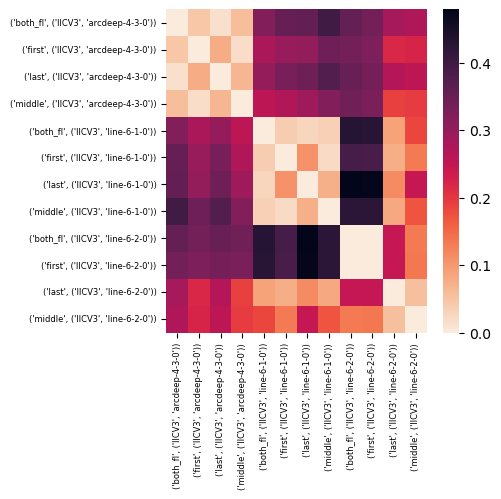

In [72]:
# Plot RSA
label_vars = [var_effect, "_vars_others"]
context_dict = None
# context_dict = {
#     # "same":["shape", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_loconclust_next"],
#     # "same":["loc_on_clust"],
#     # "same":["CTXT_loc_prev", "gridloc"],
#     "same":["gridloc"],
#     "diff":[],
#     }
_, CldistAgg = Cldist.rsa_distmat_score_all_pairs_of_label_groups(label_vars=label_vars, get_only_one_direction=False, 
                                                                return_as_clustclass=True,
                                                                context_dict=context_dict,
                                                                return_as_clustclass_which_var_score="dist_yue_diff")

sort_order = (1,0)
fig, ax = CldistAgg.rsa_plot_heatmap(sort_order, zlims=None)


distmat_construct_wrapper:  50
distmat_construct_wrapper:  100
distmat_construct_wrapper:  150
distmat_construct_wrapper:  200
distmat_construct_wrapper:  250
distmat_construct_wrapper:  300
distmat_construct_wrapper:  350
distmat_construct_wrapper:  400
distmat_construct_wrapper:  450
distmat_construct_wrapper:  500
distmat_construct_wrapper:  550
distmat_construct_wrapper:  600
distmat_construct_wrapper:  650
distmat_construct_wrapper:  700
distmat_construct_wrapper:  750
distmat_construct_wrapper:  800
distmat_construct_wrapper:  850
distmat_construct_wrapper:  900
distmat_construct_wrapper:  950
distmat_construct_wrapper:  1000
distmat_construct_wrapper:  1050
distmat_construct_wrapper:  1100
distmat_construct_wrapper:  1150
distmat_construct_wrapper:  1200
distmat_construct_wrapper:  1250
distmat_construct_wrapper:  1300
distmat_construct_wrapper:  1350
distmat_construct_wrapper:  1400
distmat_construct_wrapper:  1450
distmat_construct_wrapper:  1500
distmat_construct_wrapper:  15

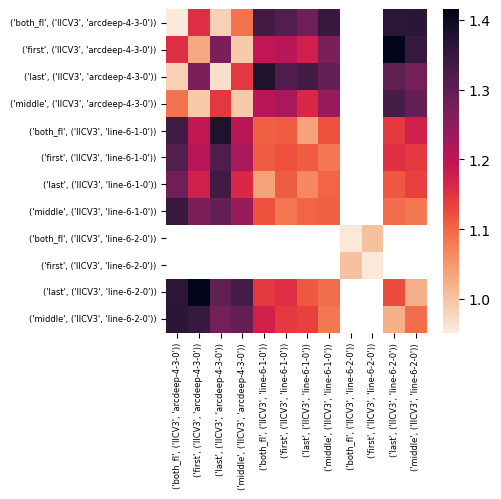

In [65]:
# Plot RSA
label_vars = [var_effect, "_vars_others"]
context_dict = None
context_dict = {
    # "same":["shape", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_loconclust_next"],
    # "same":["loc_on_clust"],
    # "same":["CTXT_loc_prev", "gridloc"],
    "same":["gridloc"],
    "diff":[],
    }
_, CldistAgg = Cldist.rsa_distmat_score_all_pairs_of_label_groups(label_vars=label_vars, get_only_one_direction=False, 
                                                                return_as_clustclass=True,
                                                                context_dict=context_dict,
                                                                return_as_clustclass_which_var_score="dist_mean")

sort_order = (1,0)
fig, ax = CldistAgg.rsa_plot_heatmap(sort_order, zlims=None)
